In [1]:
import io
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import math
import matplotlib.pyplot as plt
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")

In [2]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [18]:
df.head(50)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df["gender"].unique()

array(['Female', 'Male'], dtype=object)

In [21]:
df["customerID"].unique().sum()

'7590-VHVEG5575-GNVDE3668-QPYBK7795-CFOCW9237-HQITU9305-CDSKC1452-KIOVK6713-OKOMC7892-POOKP6388-TABGU9763-GRSKD7469-LKBCI8091-TTVAX0280-XJGEX5129-JLPIS3655-SNQYZ8191-XWSZG9959-WOFKT4190-MFLUW4183-MYFRB8779-QRDMV1680-VDCWW1066-JKSGK3638-WEABW6322-HRPFA6865-JZNKO6467-CHFZW8665-UTDHZ5248-YGIJN8773-HHUOZ3841-NFECX4929-XIHVW6827-IEAUQ7310-EGVHZ3413-BMNZE6234-RAAPL6047-YHPVI6572-ADKRS5380-WJKOV8168-UQWWF8865-TNMNX9489-DEDVP9867-JCZSP4671-VJLCL4080-IIARD3714-NTNFO5948-UJZLF7760-OYPDY7639-LIAYI2954-PIBKO8012-SOUDQ9420-LOJKX6575-SUVOI7495-OOKFY4667-QONEA1658-BYGOY8769-KKTPH5067-XJQFU3957-SQXML5954-BDFSG0434-CSFON1215-FIGMP0526-SXDJP0557-ASKVU5698-BQJOH5122-CYFXA8627-ZYGSZ3410-YOQBQ3170-NMYVV7410-OIEDU2273-QCKXA0731-EBJQB1891-QRQSA8028-PNXHQ5630-AHZIL2673-CXQEU6416-JNVRK5590-ZSKRV0191-ZHSKZ3887-PBQAO5919-TMRGD8108-UXRQN9191-MYQKX9919-YLNNG0318-ZOPWS4445-ZJNMU4808-YNLEU1862-QRWPE2796-NNUFI3016-KSVCP4767-HZZHQ2424-WVHPL7233-PAHHL6067-NGCEU9848-JQJTX8637-XJIVR9803-FTJCG0278-YXOOG3212-KXOCR4598-XLKN

In [8]:
df.shape

(7043, 21)

In [10]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [11]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

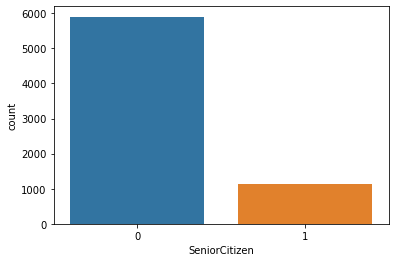

In [12]:
sns.countplot(df["SeniorCitizen"])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tenure', ylabel='Density'>

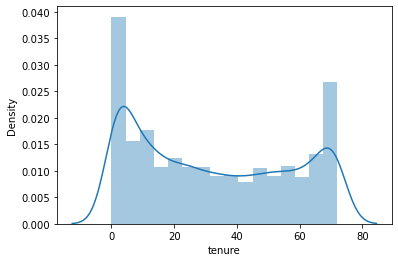

In [13]:
sns.distplot(df["tenure"])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

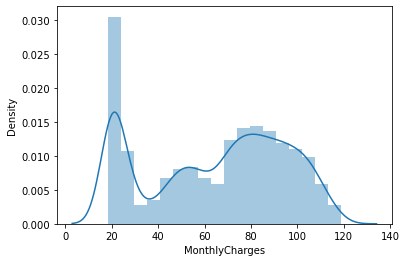

In [14]:
sns.distplot(df["MonthlyCharges"])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MonthlyCharges'>

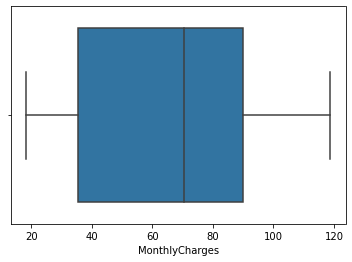

In [15]:
sns.boxplot(df["MonthlyCharges"])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tenure'>

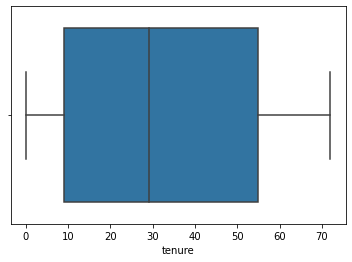

In [16]:
sns.boxplot(df["tenure"])

# Total Charge column Data type is incorrect as Blanks are present in values. Replacing with NaN

In [33]:
df["TotalCharges"]=df["TotalCharges"].replace(' ', np.nan)

In [34]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [36]:
try:
    df['TotalCharges'] = df['TotalCharges'].astype(float)
except ValueError as ve:
    print (ve)

In [37]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [38]:
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.961642
dtype: float64

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalCharges'>

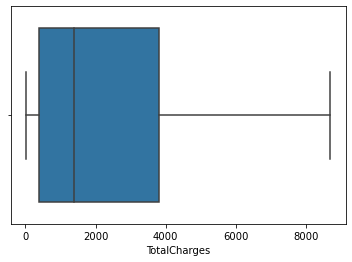

In [39]:
sns.boxplot(df["TotalCharges"])

# Missing Value Treatment

In [40]:
df["TotalCharges"]=df["TotalCharges"].fillna(df["TotalCharges"].median())

In [41]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [42]:
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.963789
dtype: float64

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalCharges'>

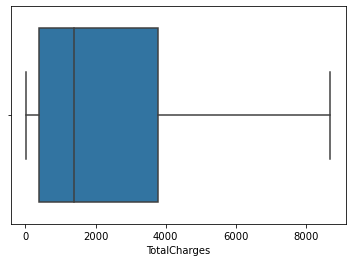

In [43]:
sns.boxplot(df["TotalCharges"])

# Encoding

In [44]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))
df

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1990.50,0
7039,1525,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,7362.90,0
7040,3367,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,346.45,0
7041,5934,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,306.60,1


<AxesSubplot:>

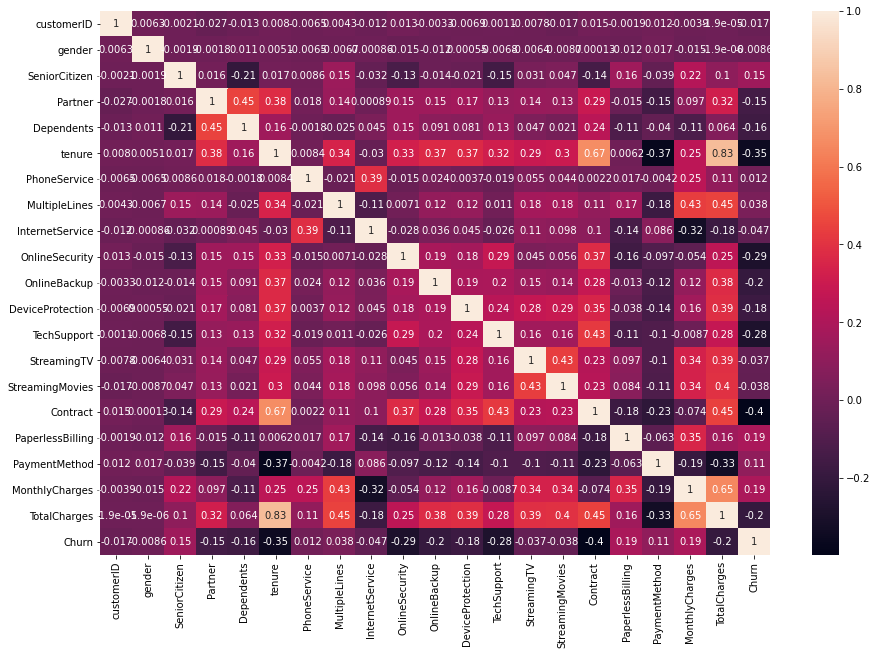

In [45]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

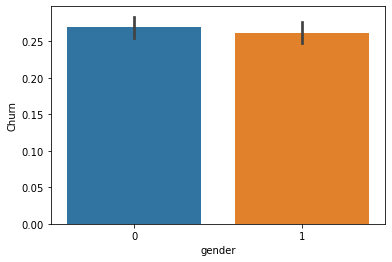

In [58]:
a=sns.barplot(x='gender',y='Churn',data=df)

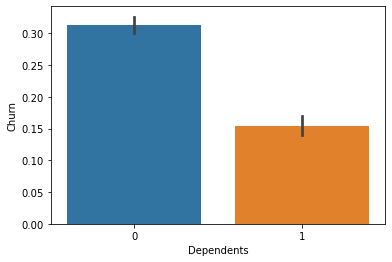

In [59]:
a=sns.barplot(x='Dependents',y='Churn',data=df)

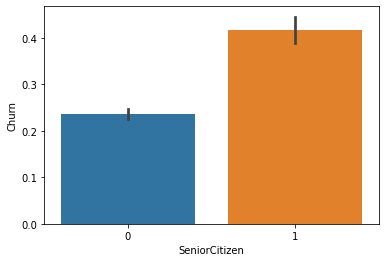

In [68]:
a=sns.barplot(x='SeniorCitizen',y='Churn',data=df)

In [69]:
df1=df.drop(["TotalCharges"],axis=1)

<AxesSubplot:>

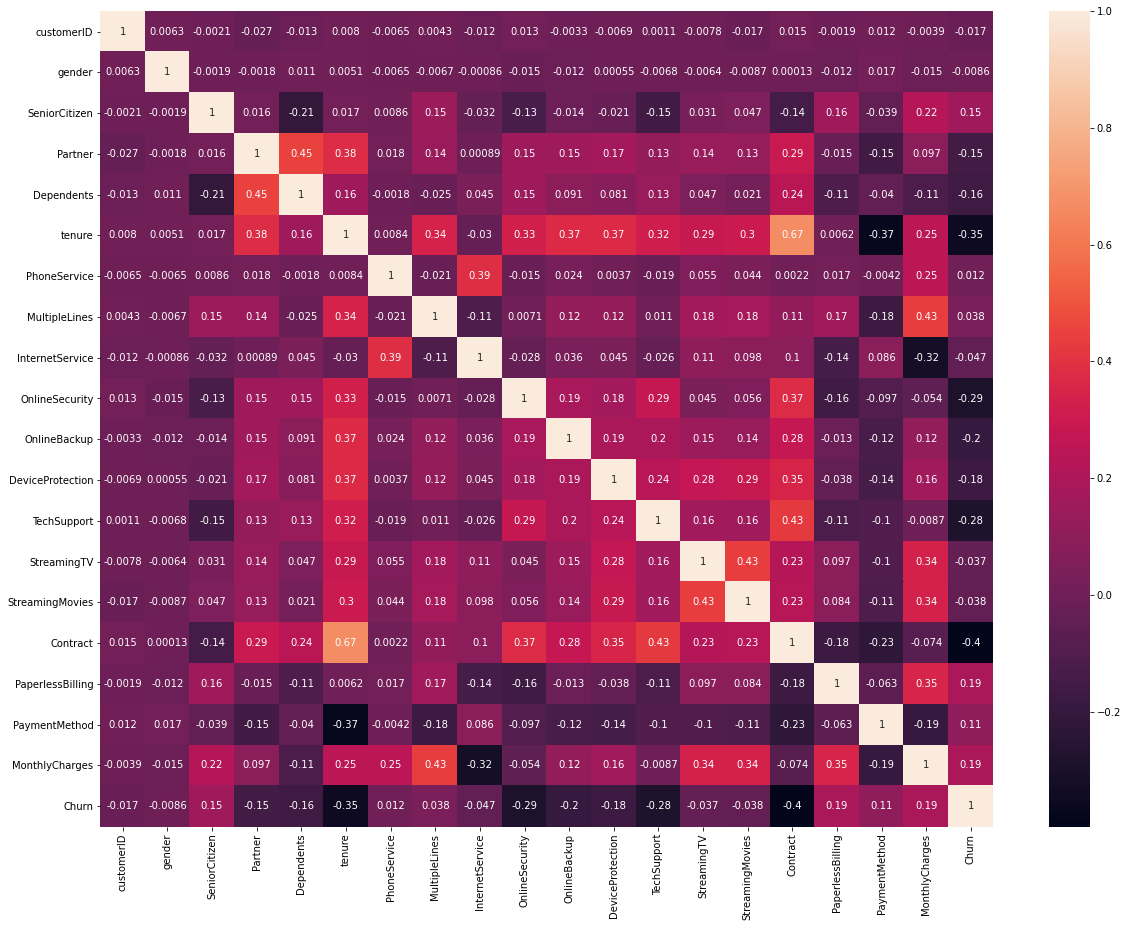

In [71]:
plt.figure(figsize=(20,15))
sns.heatmap(df1.corr(),annot=True)

In [72]:
df1=df1.drop(["Contract"],axis=1)

In [73]:
df1=df1.drop(["customerID"],axis=1)

In [75]:
df1.shape

(7043, 18)

# Splitting DataFrame

In [77]:
x=df1.iloc[:,0:17]
y=df1.iloc[:,-1]
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

# Skewness Treatment

In [78]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

# Scaling

In [79]:
from sklearn.preprocessing import StandardScaler
S=StandardScaler()
x=S.fit_transform(x)

# Logistic Regression as only 2 values in target variable

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score

In [81]:
l=[]
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state:",i)
        print("Traning score is :-",accuracy_score(y_train,pred_train)*100)
        print("Test score is :-",accuracy_score(y_test,pred_test)*100)
        l.append(i)

At random state: 9
Traning score is :- 80.33368832090876
Test score is :- 80.26969481902059
At random state: 19
Traning score is :- 80.29818956336528
Test score is :- 80.34066713981547


Random state = 9

In [82]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=9,test_size=0.20)

In [83]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.74      0.79      0.76      1044
           1       0.25      0.20      0.22       365

    accuracy                           0.64      1409
   macro avg       0.49      0.49      0.49      1409
weighted avg       0.61      0.64      0.62      1409



In [84]:
lr_predict=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,lr_predict)
for j in range(2,10):
    lssscore=cross_val_score(lr,x,y,cv=j)
    lsc=lssscore.mean()
    print("cv:",j)
    print("cross validation score is",lsc*100)
    print("Accuracy_score :",lss*100)

cv: 2
cross validation score is 80.32085736574308
Accuracy_score : 81.05039034776436
cv: 3
cross validation score is 80.20728916322915
Accuracy_score : 81.05039034776436
cv: 4
cross validation score is 80.2499144984771
Accuracy_score : 81.05039034776436
cv: 5
cross validation score is 80.19313746048132
Accuracy_score : 81.05039034776436
cv: 6
cross validation score is 80.02272162846324
Accuracy_score : 81.05039034776436
cv: 7
cross validation score is 80.20730772127061
Accuracy_score : 81.05039034776436
cv: 8
cross validation score is 80.0796325198638
Accuracy_score : 81.05039034776436
cv: 9
cross validation score is 80.20735456527365
Accuracy_score : 81.05039034776436


choosing CV=2

# ROC Curve

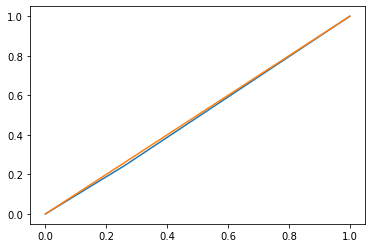

In [85]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])

# RFC

In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score

parameters = {'criterion':['gini', 'entropy'],'max_features':["auto", "sqrt", "log2"],'class_weight':["balanced","balanced_subsample"],'random_state':[9]}
rf =RandomForestClassifier()
FitParameters = GridSearchCV(rf,parameters)
FitParameters.fit(x_train,y_train)

print(FitParameters.best_params_)

{'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'auto', 'random_state': 9}


In [87]:
rf= RandomForestClassifier(criterion="entropy",max_features="auto",class_weight="balanced",random_state=9)
rf.fit(x_train, y_train)
rf.score(x_train, y_train)
pred_decision = rf.predict(x_test)
print(classification_report(pred_decision,y_test))


              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1149
           1       0.43      0.60      0.50       260

    accuracy                           0.78      1409
   macro avg       0.66      0.71      0.68      1409
weighted avg       0.81      0.78      0.79      1409



# DTC

In [88]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'criterion':['gini', 'entropy'],'max_features':["auto", "sqrt", "log2"],'splitter':["best", "random"],'random_state':[9]}
DTC =DecisionTreeClassifier()
FitParameters = GridSearchCV(DTC,parameters)
FitParameters.fit(x_train,y_train)
print(FitParameters.best_params_)

{'criterion': 'gini', 'max_features': 'auto', 'random_state': 9, 'splitter': 'best'}


In [89]:
from sklearn.metrics import classification_report
DTC1= DecisionTreeClassifier(criterion="gini",max_features="auto",random_state=9,splitter="best")
DTC1.fit(x_train, y_train)
DTC1.score(x_train, y_train)
x_predict = DTC1.predict(x_test)
print(classification_report(x_predict,y_test))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1034
           1       0.48      0.46      0.47       375

    accuracy                           0.72      1409
   macro avg       0.64      0.64      0.64      1409
weighted avg       0.72      0.72      0.72      1409



# SVC

In [90]:
from sklearn import svm
parameters = {'gamma':['scale','auto'],'random_state':[9],'shrinking':[True,False]}
SVC=svm.SVC()
FitParameters = GridSearchCV(SVC,parameters)
FitParameters.fit(x_train,y_train)
print(FitParameters.best_params_)

{'gamma': 'scale', 'random_state': 9, 'shrinking': True}


In [91]:
svc= svm.SVC(gamma="scale",random_state=9,shrinking=True)
svc.fit(x_train, y_train)
svc.score(x_train, y_train)
x_predict = svc.predict(x_test)
print(classification_report(x_predict,y_test))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86      1160
           1       0.43      0.63      0.51       249

    accuracy                           0.79      1409
   macro avg       0.67      0.73      0.69      1409
weighted avg       0.83      0.79      0.80      1409



From the above we could see that SVC is the best fit algorithm for this data set

In [92]:
import pickle
filename = 'CC.pkl'
pickle.dump(svc, open(filename, 'wb'))

In [93]:
import numpy as np
a=np.array(y_test)
a

array([1, 0, 1, ..., 0, 0, 0])

In [94]:
predicted=np.array(rf.predict(x_test))
predicted
predicted.shape
rf.predict(x_test)

array([0, 0, 1, ..., 0, 0, 0])

In [95]:
conclusion=pd.DataFrame({"original":a,"predicted":predicted}, index= range(len(a)))
conclusion

,original,predicted
0,1,0
1,0,0
2,1,1
3,1,0
4,0,0
...,...,...
1404,0,0
1405,1,1
1406,0,0
1407,0,0
